In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
dataset= pd.read_csv("stroke.csv") #fix the code


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [4]:
dataset.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [5]:
dataset.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4971,Male,37.00,0,0,Yes,Private,Rural,107.06,29.7,smokes,0
4972,Male,72.00,0,1,Yes,Private,Rural,238.27,30.7,smokes,0
4973,Male,1.32,0,0,No,children,Rural,107.02,18.8,Unknown,0
4974,Male,58.00,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4975,Male,31.00,0,0,No,Private,Urban,215.07,32.7,smokes,0
4976,Male,41.00,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.00,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.00,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.00,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [6]:
#0 Govt_job 1  Private 2 Self-employed  3 children 
#0 Unkown  1  formerly smoked 2 never smoked 3 smokes


In [7]:
print(dataset.shape)
# This has 10 features
# This is a classification problem (1 target variable)
# The target variable, stroke, is binary, indicating whether a patient has experienced a stroke (1) or not (0).
# There are 4981 data points in the dataset. (basically rows in the dataset)
# the datra set has 11 columns which contains both categorical and numerical data (Quatative data)
#There are 7 categorical features and 3 numerical features in the dataset.
print(dataset.columns)

(4981, 11)
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [8]:
# for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
# data types
data_types = dataset.dtypes
print("\nData Types:")
print(data_types)


Data Types:
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


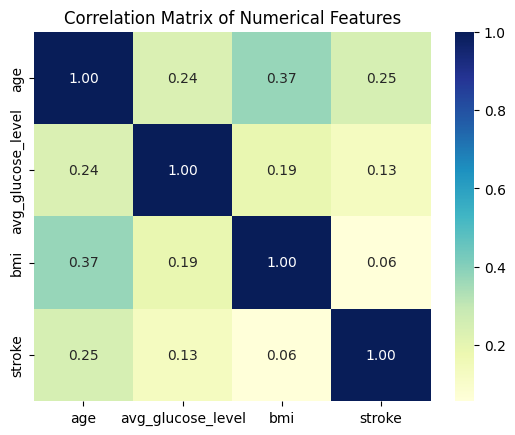

In [10]:
numerical_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']
correlation_matrix= dataset[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True,cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

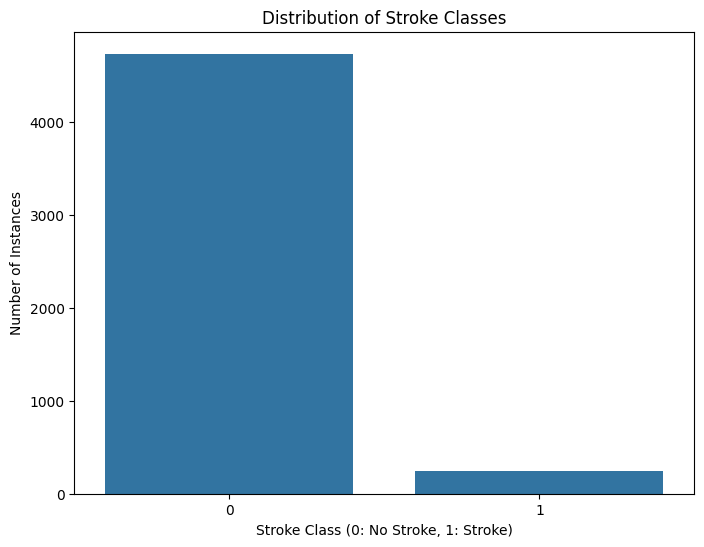

The classes are not balanced.


In [11]:
# Count the occurrences of each unique value in the 'stroke' column
stroke_counts = dataset['stroke'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values)
plt.title('Distribution of Stroke Classes')
plt.xlabel('Stroke Class (0: No Stroke, 1: Stroke)')
plt.ylabel('Number of Instances')
plt.show()

# Print whether the classes are balanced
if len(stroke_counts) > 1:
  if abs(stroke_counts.iloc[0] - stroke_counts.iloc[1]) < 10 :
     print("The classes are balanced.")
  else:
      print("The classes are not balanced.")
else:
    print("There is only one class in the output feature")

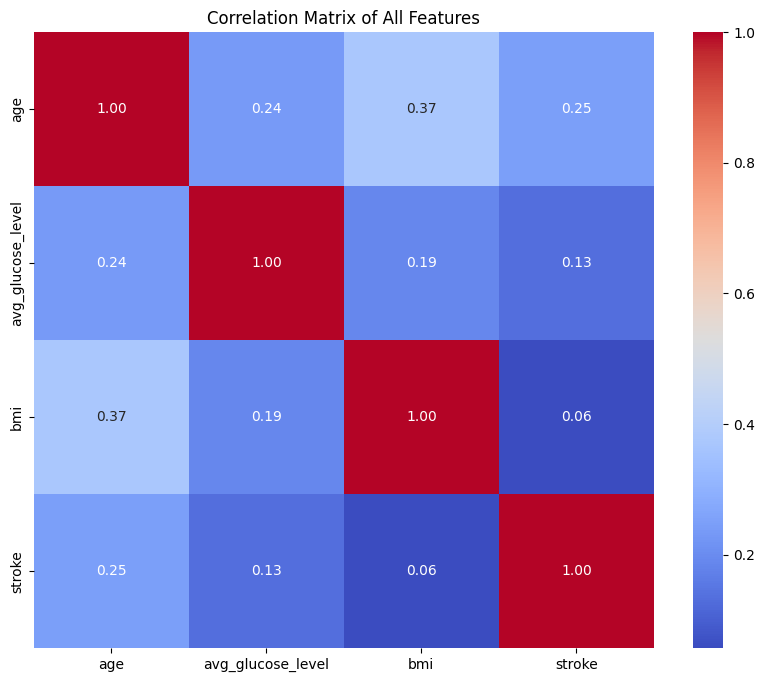

In [12]:
# Calculate the correlation matrix
numerical_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']
correlation_matrix = dataset[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

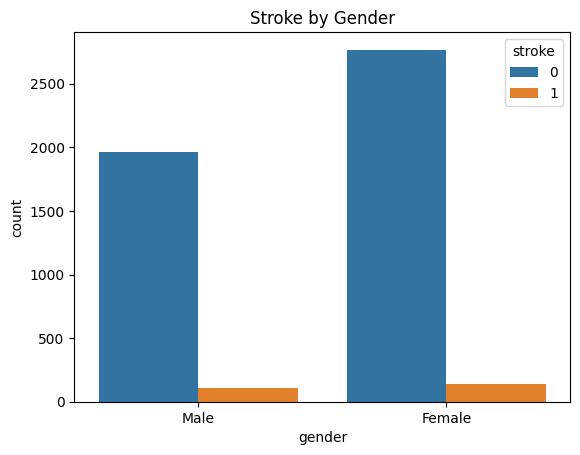

In [13]:
sns.countplot(x='gender', hue='stroke', data=dataset)
plt.title('Stroke by Gender')
plt.show()

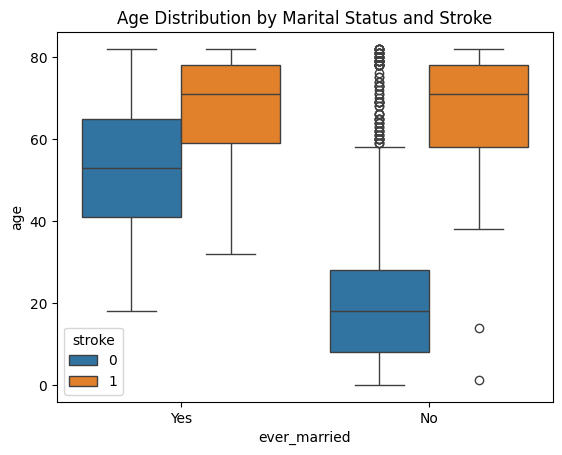

In [14]:
sns.boxplot(x='ever_married', y='age', hue='stroke', data=dataset)
plt.title('Age Distribution by Marital Status and Stroke')
plt.show()

In [15]:
# Identify columns with NULL values
missing_values = dataset.isnull().sum()   #Null values in the dataset
print("Missing Values:")
print(missing_values)

# List of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
print("\nCategorical Features:")
print(categorical_features)

Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Categorical Features:
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [16]:
import random
randomindecises = [random.randint(0, dataset.shape[0]) for i in range(random.randint(1,20))]
print(randomindecises)

[3464, 1116, 4636]


In [17]:
#Making the data unprocessed for the project - This cell should be run one single time for the entire project
#adding some null values in the dataset
#Particular these columns mentioned below

# Setting null values at 'stroke' column
forhypertension=[random.randint(0, dataset.shape[0]) for i in range(random.randint(1,20))]
for i in range(len(forhypertension)):
    dataset.at[forhypertension[i], 'hypertension'] = np.nan


#Setting null values at 'bmi' column
forbmi=[random.randint(0, dataset.shape[0]) for i in range(random.randint(1,20))]
for i in range(len(forbmi)):
    dataset.at[forbmi[i], 'bmi'] = np.nan

#Setting null values at 'age' column
forage=[random.randint(0, dataset.shape[0]) for i in range(random.randint(1,20))]
for i in range(len(forage)):
    dataset.at[forage[i], 'age'] = np.nan

In [18]:
# Identify columns with NULL values
missing_values = dataset.isnull().sum()   #Null values in the dataset
print("Missing Values:")
print(missing_values)

Missing Values:
gender                0
age                  20
hypertension         20
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  12
smoking_status        0
stroke                0
dtype: int64


In [19]:
# 1. Impute 'bmi' with the median
median_imputer = SimpleImputer(strategy='median')
dataset['bmi'] = median_imputer.fit_transform(dataset[['bmi']])
# 2. Impute 'age' with the mean
mean_imputer = SimpleImputer(strategy='mean')
dataset['age'] = mean_imputer.fit_transform(dataset[['age']])
# 3. Impute 'stroke' with the most frequent value
most_frequent_imputer = SimpleImputer(strategy='most_frequent')


In [20]:
# Identify columns with NULL values
missing_values = dataset.isnull().sum()   #Null values in the dataset
print("Missing Values:")
print(missing_values)

Missing Values:
gender                0
age                   0
hypertension         20
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
dtype: int64


In [21]:
# List of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
print("\nCategorical Features:")
print(categorical_features)

#Encoding categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le # Store the encoder for later use if needed

# Identify columns with NULL values after imputation
missing_values = dataset.isnull().sum()   #Null values in the dataset
print("Missing Values:")
missing_values


Categorical Features:
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Missing Values:


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
dataset.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
5,1,74.0,1,1,1,1,0,70.09,27.4,2,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1
7,0,78.0,0,0,1,1,1,58.57,24.2,0,1
8,0,81.0,1,0,1,1,0,80.43,29.7,2,1
9,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [23]:
# MinMaxScaler is used to scale numerical features to a range between 0 and 1.
# It preserves the original distribution of the data and is suitable for algorithms that benefit from scaled inputs.
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = MinMaxScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Display the first few rows of the scaled dataset
print(dataset.head())

   gender       age  hypertension  heart_disease  ever_married  work_type  \
0       1  0.816895             0              1             1          1   
1       1  0.975586             0              1             1          1   
2       0  0.597168             0              0             1          1   
3       0  0.963379             1              0             1          2   
4       1  0.987793             0              0             1          1   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1           0.801265  0.647564               1       1  
1               0           0.234512  0.530086               2       1  
2               1           0.536008  0.584527               3       1  
3               0           0.549349  0.286533               2       1  
4               1           0.605161  0.429799               1       1  


In [24]:
#Data Set Splitting
# Separate features (X) and target variable (y)
X = dataset.drop('stroke', axis=1)
y = dataset['stroke']

# Split the dataset into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3486, 10)
X_test shape: (1495, 10)
y_train shape: (3486,)
y_test shape: (1495,)


Main Model Training - KNN


Accuracy: 0.9498

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.40      0.03      0.05        74

    accuracy                           0.95      1495
   macro avg       0.68      0.51      0.51      1495
weighted avg       0.92      0.95      0.93      1495



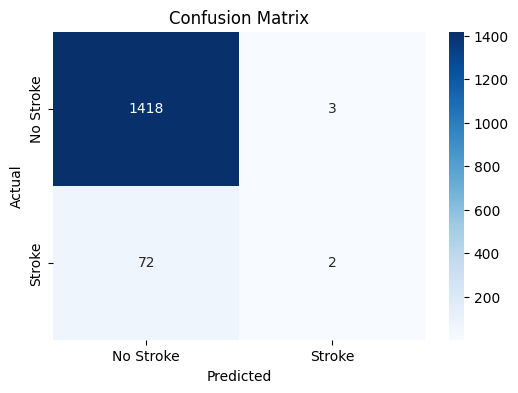

In [25]:
# Initialize the KNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [26]:
# Calculate precision and recall - KNN
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

KNN_score=[accuracy,precision,recall]

Precision: 0.9244
Recall: 0.9498

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.40      0.03      0.05        74

    accuracy                           0.95      1495
   macro avg       0.68      0.51      0.51      1495
weighted avg       0.92      0.95      0.93      1495



Decision Tree


Accuracy (Decision Tree): 0.9137

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1421
           1       0.16      0.18      0.17        74

    accuracy                           0.91      1495
   macro avg       0.56      0.56      0.56      1495
weighted avg       0.92      0.91      0.92      1495



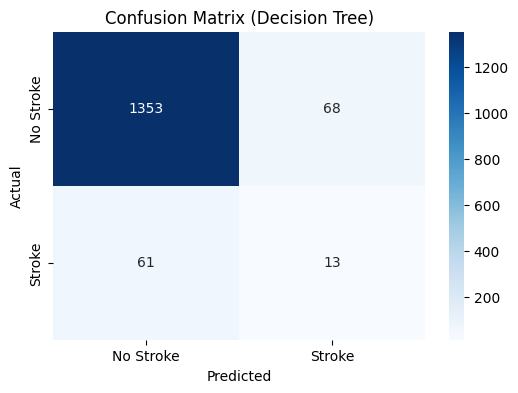

Precision (Decision Tree): 0.9174
Recall (Decision Tree): 0.9137

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1421
           1       0.16      0.18      0.17        74

    accuracy                           0.91      1495
   macro avg       0.56      0.56      0.56      1495
weighted avg       0.92      0.91      0.92      1495



In [27]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")

# Print classification report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix (Decision Tree)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Calculate precision and recall - Decision Tree
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)

# Print the results
print(f"Precision (Decision Tree): {precision_dt:.4f}")
print(f"Recall (Decision Tree): {recall_dt:.4f}")

# Print the classification report for more detailed metrics
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, zero_division=0))

DT_score = [accuracy_dt, precision_dt, recall_dt]

Logistic Regression


Accuracy (Logistic Regression): 0.9505
Precision (Logistic Regression): 0.9035
Recall (Logistic Regression): 0.9505


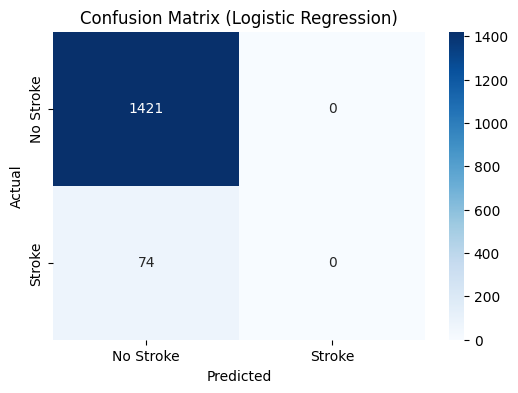


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



In [28]:
# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42) # You can adjust hyperparameters here

# Train the Logistic Regression model
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (Logistic Regression): {accuracy_lr:.4f}")

# Calculate precision and recall
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)

print(f"Precision (Logistic Regression): {precision_lr:.4f}")
print(f"Recall (Logistic Regression): {recall_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Print the classification report for more detailed metrics
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, zero_division=0))

LR_score = [accuracy_lr, precision_lr, recall_lr]

Naive Bayes

Accuracy (Naive Bayes): 0.8742
Precision (Naive Bayes): 0.9231
Recall (Naive Bayes): 0.8742


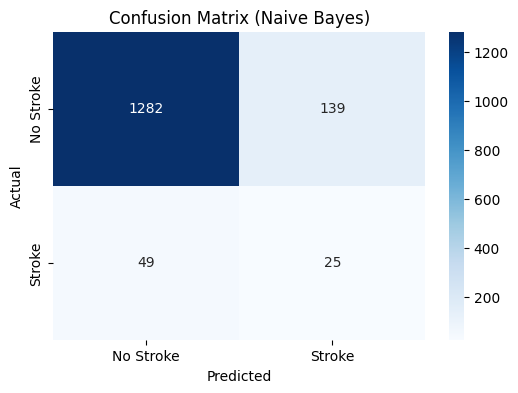


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1421
           1       0.15      0.34      0.21        74

    accuracy                           0.87      1495
   macro avg       0.56      0.62      0.57      1495
weighted avg       0.92      0.87      0.90      1495



In [29]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.4f}")

# Calculate precision and recall
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)

print(f"Precision (Naive Bayes): {precision_nb:.4f}")
print(f"Recall (Naive Bayes): {recall_nb:.4f}")

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix (Naive Bayes)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Print the classification report for more detailed metrics
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb, zero_division=0))

NB_score = [accuracy_nb, precision_nb, recall_nb]

<h1>Neural Networks
<h2> Feedforward Neural Network



In [30]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

# Generate classification report
print(classification_report(y_test, y_pred))

Epoch 1/10


c:\Users\USERAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7494 - loss: 0.4886 - val_accuracy: 0.9527 - val_loss: 0.2105
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9500 - loss: 0.2154 - val_accuracy: 0.9527 - val_loss: 0.2012
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.9428 - loss: 0.2216 - val_accuracy: 0.9527 - val_loss: 0.1922
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.9484 - loss: 0.1952 - val_accuracy: 0.9527 - val_loss: 0.1849
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9448 - loss: 0.1997 - val_accuracy: 0.9527 - val_loss: 0.1806
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.9458 - loss: 0.1951 - val_accuracy: 0.9527 - val_loss: 0.1751
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9499 - loss: 0.1775 - val_accuracy: 0.9527 - val_loss: 0.1748
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.9449 - loss: 0.1785 - val_accuracy: 0.9527 - val_lo

c:\Users\USERAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USERAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USERAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

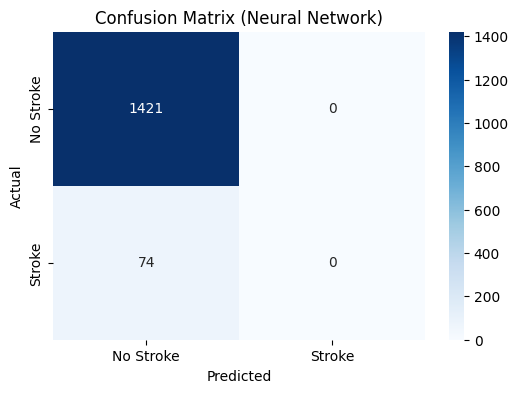

In [31]:
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix (Neural Network)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

<h2>Model Performance Evaluation

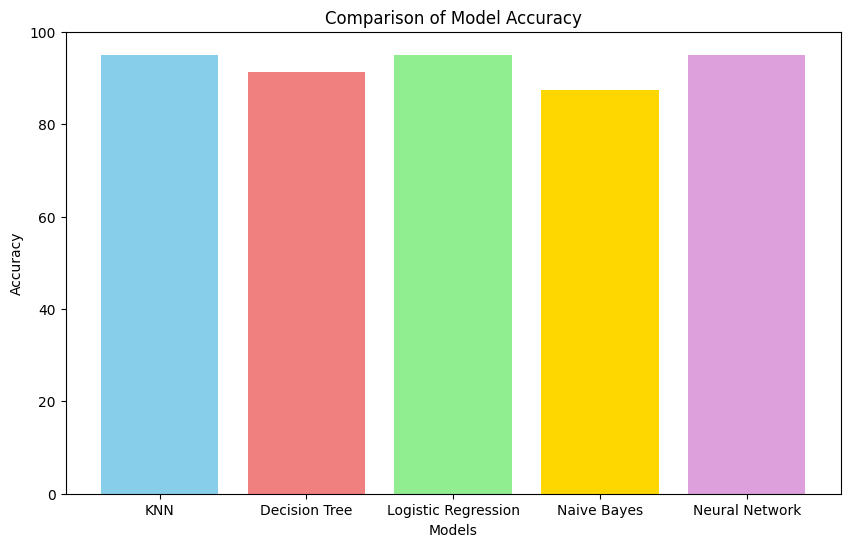

In [32]:
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Neural Network']
accuracy_scores = [KNN_score[0], DT_score[0], LR_score[0], NB_score[0], accuracy]
accuracy_score_with_100 = []
for i in range(len(accuracy_scores)):
    accuracy_score_with_100.append(accuracy_scores[i]*100)

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_score_with_100, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracy")
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for accuracy
plt.show()

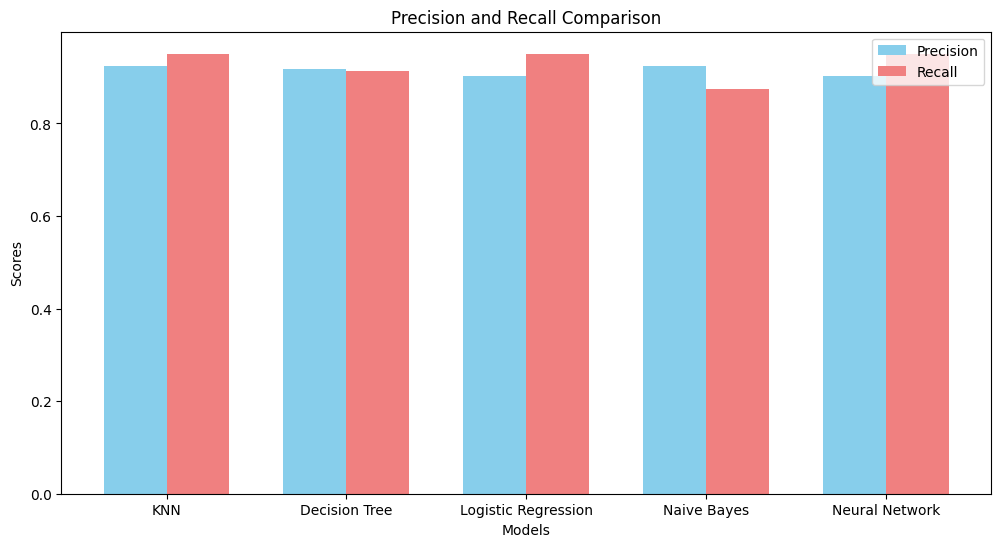

In [33]:
# Precision and Recall Comparison
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Neural Network']
precision_scores = [KNN_score[1], DT_score[1], LR_score[1], NB_score[1], precision_score(y_test, y_pred, average='weighted', zero_division=0)]
recall_scores = [KNN_score[2], DT_score[2], LR_score[2], NB_score[2], recall_score(y_test, y_pred, average='weighted', zero_division=0)]


# Create the plot
x = range(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

rects1 = ax1.bar([i - width/2 for i in x], precision_scores, width, label='Precision', color='skyblue')
rects2 = ax1.bar([i + width/2 for i in x], recall_scores, width, label='Recall', color='lightcoral')

ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.set_title('Precision and Recall Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()


plt.show()

In [81]:
gender = int(input("Enter gender (0 for female, 1 for male): "))
age = float(input("Enter age (scaled between 0 and 1): "))
hypertension = int(input("Enter hypertension (0 for no, 1 for yes): "))
heart_disease = int(input("Enter heart disease (0 for no, 1 for yes): "))
ever_married = int(input("Enter marital status (0 for no, 1 for yes): "))
work_type = int(input("Enter work type (0 Govt_job 1  Private 2 Self-employed  3 children ): "))
Residence_type = int(input("Enter residence type (0 for rural, 1 for urban): "))
avg_glucose_level = float(input("Enter average glucose level (scaled between 0 and 1 (mg/dL)): "))
bmi = float(input("Enter BMI (scaled between 0 and 1): "))
smoking_status = int(input("Enter smoking status (0 Unkown  1  formerly smoked  2 never smoked  3 smokes): "))


In [90]:
sampleanswers=[]
input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'ever_married': [ever_married],
        'work_type': [work_type],
        'Residence_type': [Residence_type],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'smoking_status': [smoking_status]
    })
#0 Govt_job 1  Private 2 Self-employed  3 children 
#0 Unkown  1  formerly smoked 2 never smoked 3 smokes

In [91]:
#Final prediction
prediction = knn_classifier.predict(input_data)
sampleanswers.append(prediction[0])
prediction = dt_classifier.predict(input_data)
sampleanswers.append(prediction[0])
prediction = logreg_classifier.predict(input_data)
sampleanswers.append(prediction[0])
prediction = nb_classifier.predict(input_data)
sampleanswers.append(prediction[0])
prediction = model.predict(input_data)
prediction2 = (prediction > 0.5).astype(int)
sampleanswers.append(prediction2[0][0])
if sampleanswers.count(1) > sampleanswers.count(0):
    print("The majority of models predict that the person is likely to have a stroke.")
else:
    print("The majority of models predict that the person is not likely to have a stroke.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
The majority of models predict that the person is likely to have a stroke.
